# Import the repository from GitHub

First of all we start by importing the repository that we stored in the github project.


In [1]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secret_value_1 = user_secrets.get_secret("NEW_GITHUB_TOKEN")

In [2]:
token = UserSecretsClient().get_secret("NEW_GITHUB_TOKEN")
! git clone https://{token}@github.com/madratak/DIQ_Project2024.git

Cloning into 'DIQ_Project2024'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 88 (delta 28), reused 14 (delta 2), pack-reused 0 (from 0)
Unpacking objects: 100% (88/88), 705.16 KiB | 5.07 MiB/s, done.


In [3]:
%cd /kaggle/working/DIQ_Project2024

/kaggle/working/DIQ_Project2024


# Set up the dataset

At this point we can proceed by importing the correct libraries and then importing the data itself inside our notebook.

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
import os

In [5]:
SERVICES = pd.read_csv('/kaggle/working/DIQ_Project2024/data/raw/Comune-di-Milano-Servizi-alla-persona-parrucchieri-estetisti.csv',sep=';',encoding='unicode_escape')
SERVICES.head()

,Tipo esercizio pa,Ubicazione,Tipo via,Via,Civico,Codice via,ZD,Prevalente,Superficie altri usi,Superficie lavorativa
0,NaN,LGO DEI GELSOMINI N. 10 (z.d. 6),LGO,DEI GELSOMINI,10,5394.0,6,NaN,NaN,55.0
1,NaN,PZA FIDIA N. 3 (z.d. 9),PZA,FIDIA,3,1144.0,9,CENTRO MASSAGGI RILASSANTI NON ESTETICI,2.0,28.0
2,NaN,VIA ADIGE N. 10 (z.d. 5),VIA,ADIGE,10,4216.0,5,CENTRO BENESSERE,2.0,27.0
3,NaN,VIA BARACCHINI FLAVIO N. 9 (z.d. 1),VIA,BARACCHINI FLAVIO,9,356.0,1,TRUCCO SEMIPERMANENTE,NaN,NaN
4,NaN,VIA BERGAMO N. 12 (z.d. 4),VIA,BERGAMO,12,3189.0,4,NaN,NaN,50.0


# Data inspection

In this section we inserted all those operations that aim at unerstanding the content of our dataset:
Total number of records in the dataset, datatype of each column, number of unique values for each attribute, ecc. 

In [6]:
print("\nThe shape of our dataset (rows, columns) is the following: ", SERVICES.shape)

print("\nThe data types of the different columns are the following:\n", SERVICES.dtypes)


The shape of our dataset (rows, columns) is the following:  (3909, 10)

The data types of the different columns are the following:
 Tipo esercizio pa         object
Ubicazione                object
Tipo via                  object
Via                       object
Civico                    object
Codice via               float64
ZD                        object
Prevalente                object
Superficie altri usi     float64
Superficie lavorativa    float64
dtype: object


Now the next thing to do is to check if our dataset contains rows that are complete copies of previous ones. If any duplicates are detected we count and list them

## Duplicates

In [7]:
if SERVICES.duplicated().any():
    print("The number of duplicated rows in the dataset is: {}".format(len(SERVICES[SERVICES.duplicated()]))) 

print()
SERVICES[SERVICES.duplicated()].head()

The number of duplicated rows in the dataset is: 1



,Tipo esercizio pa,Ubicazione,Tipo via,Via,Civico,Codice via,ZD,Prevalente,Superficie altri usi,Superficie lavorativa
88,Acconciatore,VIA CORREGGIO N. 8 (z.d. 7),VIA,CORREGGIO,8,6287.0,7,ACCONCIATORE,NaN,NaN


## Completeness

Completeness is defined as the total number of not null cells devided by the total number of cells.

In [8]:
#Here we visualize the table with all the null-value cells
SERVICES.isnull()

,Tipo esercizio pa,Ubicazione,Tipo via,Via,Civico,Codice via,ZD,Prevalente,Superficie altri usi,Superficie lavorativa
0,True,False,False,False,False,False,False,True,True,False
1,True,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,True,True
4,True,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...
3904,False,False,False,False,False,False,False,True,True,True
3905,False,False,False,False,False,False,False,True,True,False
3906,False,False,False,False,False,False,False,True,True,True
3907,False,False,False,False,True,False,False,True,True,True


In [9]:
#display the number of not null values for each column
print("The total number of not null values for each column is:\n")
print(SERVICES.count())

#total number of not null values
not_null_values = SERVICES.count().sum()
#number of null values for each column
null_values = SERVICES.isnull().sum()
#total number of null values
total_number_of_null = null_values.sum()
#total number of cells
n_cells = SERVICES.shape[0] * SERVICES.shape[1]

completeness = (n_cells - total_number_of_null) / n_cells
completeness_3f = '{0:.3f}%'.format(completeness*100)


print("\nTHE COMPLETENESS OF OUR DATASET IS: ", completeness_3f)

The total number of not null values for each column is:

Tipo esercizio pa        3878
Ubicazione               3909
Tipo via                 3908
Via                      3908
Civico                   3832
Codice via               3908
ZD                       3908
Prevalente                294
Superficie altri usi      745
Superficie lavorativa    2601
dtype: int64

THE COMPLETENESS OF OUR DATASET IS:  79.025%


## Timeliness
Our dataset **does not need** the analysis of the ***TIMELINESS*** however we can still evaluate the *CONSISTENCY* and the *ACCURACY* of our data.

## Consistency

Consistency checks that data follows a set of user-defined rules. Considering che context of our dataset some rules that we can try to enforce on it are: 

- The column "Ubicazione" should be the combination of "Tipo via + Via + Civico + ZD";
- Values in both "superficie lavorativa" and "superficie altri usi" must have positive values;
 

In [10]:
def is_consistent(row):
    errors = []  # List to store all errors
    result = True
    
    # Convert the "Ubicazione" column to lowercase and split it into parts
    parts = row["Ubicazione"].lower().split(" ")

    # Extract "Tipo Via" (first word)
    tipo_via = parts[0]

    if not any(part.startswith("n.") or part.startswith("num.") for part in parts):
        errors.append("N./num. missing")
        result = False

    # Determine which keyword is present (checking both "n." and "num." as prefix)
    keyword = None
    for part in parts:
        if part.startswith("n."):
            keyword = "n."
            break
        elif part.startswith("num."):
            keyword = "num."
            break

    if keyword is None:
        errors.append("N./num. missing")
        result = False

    # Extract everything between "Tipo Via" and "N." or "num." for the "Via" (street name)
    via_parts = []
    for part in parts[1:]:
        if part.startswith(keyword):
            break
        via_parts.append(part)
    via = " ".join(via_parts)

    # Extract "Civico" (the number after "N." or "num.")
    civico = None
    if keyword == "num.":
        for part in parts:
            if part.startswith(keyword):
                civico = part[len(keyword):]  # remove 'n.' or 'num.' part to get the civico
                break
    
        if not civico:
            errors.append("Missing Civico")
            result = False

    elif keyword == "n.":
        # Handle the case when 'n.' is found in the parts list
        if keyword in parts:
            civico_index = parts.index(keyword) + 1
            if civico_index < len(parts):
                civico = parts[civico_index]
            else:
                errors.append("Missing Civico after 'n.'")
                result = False
        else:
            errors.append("Missing 'n.' in the parts list")
            result = False
            

    # Extract "ZD" (the last number in the string)
    try:
        zd = parts[-1].strip("(z.d. )")
    except Exception as e:
        errors.append(f"Error extracting ZD")
        result = False

    # Check if "Tipo via" is consistent
    if isinstance(row["Tipo via"], str) and row["Tipo via"].lower() != tipo_via:
        errors.append("Tipo via mismatch")
        result = False
    elif not isinstance(row["Tipo via"], str):
        errors.append(f"Invalid Tipo via")
        result = False

    # Check if "Via" is consistent (handle case where it's not a string)
    if isinstance(row["Via"], str) and row["Via"].lower() != via:
        errors.append("Via mismatch")
        result = False
    elif not isinstance(row["Via"], str):
        errors.append(f"Invalid Via")
        result = False

    # Check if "Civico" is consistent
    if str(row["Civico"]).lower() != civico:
        errors.append("Civico mismatch")
        result = False

    # Check if "ZD" is consistent
    if isinstance(row["ZD"], str) and row["ZD"].lower() != zd:
        errors.append("ZD mismatch")
        result = False
    elif not isinstance(row["ZD"], str):
        errors.append(f"Invalid ZD")
        result = False

    # Return the result with all errors if any
    if result:
        return [True, ""]
    else:
        return [False, errors]


# Print inconsistent rows

reasons_errors = {}
total_errors = 0
for index, row in SERVICES.iterrows():
    r = is_consistent(row)
    if not r[0]:

        for error in r[1]:
            if error not in reasons_errors:
                reasons_errors[error] = 0
            reasons_errors[error] += 1
        
        total_errors += len(r[1])

# Calculate the width of the "Error" column (based on the longest error name)
max_error_length = max(len(error) for error in reasons_errors.keys())

# Print the header
print("Error counts:\n")

# Print each row with aligned columns
for error, count in reasons_errors.items():
    print(f"{error.ljust(max_error_length)}   {count}")


# Print the total number of errors
print(f"\nTotal number of errors: {total_errors}")

Error counts:

Invalid Tipo via                 1
Invalid Via                      1
Civico mismatch                  152
Invalid ZD                       1
N./num. missing                  2
Tipo via mismatch                21
Via mismatch                     88
ZD mismatch                      18
Missing 'n.' in the parts list   1

Total number of errors: 285


In [11]:
# Ensure the columns contain only numeric data
columns_to_check = ['Superficie altri usi', 'Superficie lavorativa']

# Check for non-negative values in the specified columns
try:
    numeric_columns = SERVICES[columns_to_check].select_dtypes(include=[float, int])

    # Mask for non-negative values
    all_positive = (numeric_columns >= 0).all().all()  # Collapse Series into a single boolean
    
    # Print the result
    if not all_positive:
        print("All values in the specified columns are non-negative.")
    else:
        print("There are negative values in the specified columns.")

    # Display rows with negative values
    negative_rows = SERVICES.loc[(numeric_columns < 0).any(axis=1)]
    if not negative_rows.empty:
        print("Rows with negative values:\n", negative_rows)
    else:
        print("No rows with negative values found.")
except KeyError as e:
    print(f"Error: One or more specified columns are missing in the DataFrame: {e}")

All values in the specified columns are non-negative.
No rows with negative values found.


## Accuracy

Accuracy comes in two forms: Semantic, that checks whether or not a value has a real meaning in the real world; Syntactic, that checks whether or not a value is correct syntactically, that has no errors.

- Values in the "Tipo Via" and "Via"columns must match entries in the Stradario dataset, which contains the correct road types and names. 
- Values of the "ZD" column must be in the range ascii1-9 since those are the "municipi" of the city of Milan;

In [12]:
#Now we check that the street types are correct types of streets that exist in Milano
#in oder to do this we downloaded a dataset from Comune Di Milano page that contains the whole list updated to the year 2024

TIPOVIA = pd.read_csv('/kaggle/working/DIQ_Project2024/data/external/TIPOVIA.csv',sep=';',encoding='unicode_escape')

In [13]:
allowed_tipo_via = TIPOVIA["DESC_ABBREVIATA"].str.lower().unique()
print(sorted(allowed_tipo_via))

# correct values in "Tipo via" are the ones contained in allowes_tipo_via
CORRECT = SERVICES['Tipo via'].str.lower().isin(allowed_tipo_via)

# we sum the true values in correct
CORRECT_TIPO_VIA = CORRECT.sum()

# we count the not null values of the column ZD in allowed_zd
NOT_NULL_TIPO_VIA = SERVICES['Tipo via'].count()

accuracy = CORRECT_TIPO_VIA / NOT_NULL_TIPO_VIA
accuracy_3f = '{0:.3f}%'.format(accuracy*100)

print("\nThe accuracy of the column 'Tipo via' is: {}".format(accuracy_3f))
print(f"{CORRECT_TIPO_VIA} correct values on {NOT_NULL_TIPO_VIA} not-null values.\n")
print("The invalid values are:")

invalid_values = SERVICES[~SERVICES['Tipo via'].str.lower().isin(allowed_tipo_via)]
invalid_values.head()

['alz', 'bst', 'cav', 'cso', 'for', 'gll', 'grd', 'lgo', 'mnt', 'par', 'pas', 'ple', 'psg', 'psr', 'pta', 'pte', 'pza', 'pzt', 'rca', 'rip', 'rot', 'sda', 'sit', 'snt', 'spr', 'stt', 'stv', 'sup', 'tgz', 'via', 'vle', 'vlo', 'vpr']

The accuracy of the column 'Tipo via' is: 99.923%
3905 correct values on 3908 not-null values.

The invalid values are:


,Tipo esercizio pa,Ubicazione,Tipo via,Via,Civico,Codice via,ZD,Prevalente,Superficie altri usi,Superficie lavorativa
32,Acconciatore,CSO COMO N. 15 interno club f. conti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,(z.d. 9),CSO,COMO,15,1111,9.0,ACCONCIATORE,NaN,195.0,NaN
722,ACCONCIATORE,VIE DELLA ROBBIA LUCA N. 8 ; (z.d. 8),VIE,DELLA ROBBIA LUCA,8,6349.0,8,NaN,NaN,33.0
2892,Parrucchiere per uomo;TIPO A - REG.2003;TIPO B...,VIE DELLA ROBBIA LUCA N. 8 ; (z.d. 8),VIE,DELLA ROBBIA LUCA,8,6349.0,8,NaN,NaN,NaN


In [14]:
#Now we check that the street names are correct names of streets that exist in Milano
#in oder to do this we downloaded a dataset from Comune Di Milano page that contains the whole list updated to the year 2024

STRADARIO = pd.read_csv('/kaggle/working/DIQ_Project2024/data/external/VIARIO_20241104.csv',sep=';',encoding='unicode_escape')

In [15]:
# # allowed_via = STRADARIO["DENOMINAZIONE"].str.lower().unique()
# # # print(sorted(allowed_via))

# # # correct values in "Via" are the ones contained in allowed_via
# # CORRECT = SERVICES['Via'].str.lower().isin(allowed_via)

# denominazione_lower = STRADARIO["DENOMINAZIONE"].str.lower()
# descrittivo_lower = STRADARIO["DESCRITTIVO"].str.lower()

# # Check if 'Via' matches either 'DENOMINAZIONE' or 'DESCRITTIVO'
# CORRECT = SERVICES['Via'].str.lower().isin(denominazione_lower) | SERVICES['Via'].str.lower().isin(descrittivo_lower)

# # we sum the true values in correct
# CORRECT_VIA = CORRECT.sum()

# # we count the not null values of the column ZD in allowed_zd
# NOT_NULL_VIA = SERVICES['Via'].count()

# accuracy = CORRECT_VIA / NOT_NULL_VIA
# accuracy_3f = '{0:.3f}%'.format(accuracy*100)

# print("\nThe accuracy of the column 'Via' is: {}".format(accuracy_3f))
# print(f"{CORRECT_VIA} correct values on {NOT_NULL_VIA} not-null values.\n")
# print("The invalid values are:")

# invalid_values = SERVICES[~SERVICES['Via'].str.lower().isin(allowed_via)]
# invalid_values.head()

In [16]:
allowed_zd = {'1', '2', '3', '4', '5', '6', '7', '8', '9'}

# correct values in "ZD" are the ones contained in allowed_zd
CORRECT = SERVICES['ZD'].isin(allowed_zd)

# we sum the true values in correct
CORRECT_ZD = CORRECT.sum()

# we count the not null values of the column ZD in allowed_zd
NOT_NULL_ZD = SERVICES['ZD'].count()

accuracy = CORRECT_ZD / NOT_NULL_ZD
accuracy_3f = '{0:.3f}%'.format(accuracy*100)

print("The accuracy of the column 'ZD' is: {}".format(accuracy_3f))
print(f"{CORRECT_ZD} correct values on {NOT_NULL_ZD} not-null values.\n")
print("The invalid values are:")

invalid_values = SERVICES[~SERVICES['ZD'].isin(allowed_zd)]
invalid_values.head()


The accuracy of the column 'ZD' is: 99.974%
3907 correct values on 3908 not-null values.

The invalid values are:


,Tipo esercizio pa,Ubicazione,Tipo via,Via,Civico,Codice via,ZD,Prevalente,Superficie altri usi,Superficie lavorativa
32,Acconciatore,CSO COMO N. 15 interno club f. conti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,(z.d. 9),CSO,COMO,15,1111,9.0,ACCONCIATORE,NaN,195.0,NaN


In [17]:
# #We need to convert everything to uppercase since the .isin() function is case-sensitive
# MERGED_STRADARIO['DESC_ABBREVIATA'] = MERGED_STRADARIO['DESC_ABBREVIATA'].str.upper()
# MERGED_STRADARIO.head()

In [18]:
# #Now that we have our list of streets we can use it as reference to check whether or not our analyzed dataset contains errors

# #We specify for both fields the column to check and the reference one
# street_column_to_check = 'Via'
# street_name_reference = 'DESCRITTIVO'

# type_column_to_check = 'Tipo via'
# type_reference = 'DESC_ABBREVIATA'

# #Check if the values in each column belong to the respective reference column
# is_street_valid = SERVICES[street_column_to_check].isin(MERGED_STRADARIO[street_name_reference])
# is_type_valid = SERVICES[type_column_to_check].isin(MERGED_STRADARIO[type_reference])

# #We combine the results
# all_valid = is_street_valid & is_type_valid

# #Check overall validity
# if all_valid.all():
#     print("All values in both columns are valid.")
# else:
#     print("Some values in one or both columns are not valid.")
    
#     #In the case that we encountered errors we specify in wich rows the errors have been detected
#     invalid_rows = SERVICES[~all_valid]
#     print("Invalid rows:\n", invalid_rows)

#     # Optional: Save invalid rows to a file
#     invalid_rows.to_csv('invalid_rows.csv', index=False)

# #Optional: Check invalid rows per column
# invalid_streets = SERVICES[~is_street_valid]
# invalid_types = SERVICES[~is_type_valid]

# print("Invalid STREETS:\n", invalid_streets[['Via']])
# print("Invalid TYPE:\n", invalid_types[['Tipo via']])

# Data profiling

*COLUMN ANALYSIS*

Continuing our inspection of the data we can analize column-by-column the dataset, inspecting the number of unique values for each of them and couting the most and least common ones. This kind of analysis will be useful later in our work. 

In [19]:
# #Using a loop we display for each column in the dataset the number of different values and the list in order of frequency
# for column in SERVICES.columns:
#     print(column, "\n")
#     print(f"The column '{column}' has the following number of different values: ", SERVICES[column].nunique())
#     print(f"And these are the values listed from the most frequent to the least for '{column}':")
#     print(SERVICES[column].value_counts())
#     print("\n" + "-"*50 + "\n")  # Adds a separator between the columns

## Value distribution

In [20]:
NUM = ["Superficie altri usi", "Superficie lavorativa"]

In [21]:
SERVICES[NUM].describe()

,Superficie altri usi,Superficie lavorativa
count,745.000000,2601.000000
mean,9.562416,40.158401
std,13.730086,27.736887
min,1.000000,1.000000
25%,3.000000,24.000000
50%,5.000000,34.000000
75%,12.000000,49.000000
max,195.000000,522.000000


In [22]:
DISTINCT = SERVICES[NUM[0]].nunique()
UNIQUENESS = DISTINCT / len(SERVICES[NUM[0]])
UNIQUENESS

0.01330263494499872

In [23]:
DISTINCTNESS = DISTINCT / SERVICES[NUM[0]].count()
DISTINCTNESS

0.0697986577181208

In [24]:
MAX_COUNTS = SERVICES[NUM[0]].value_counts().max()
CONSTANCY = MAX_COUNTS / SERVICES[NUM[0]].count()
CONSTANCY

0.138255033557047

array([[<Axes: title={'center': 'Superficie altri usi'}>,
        <Axes: title={'center': 'Superficie lavorativa'}>]], dtype=object)

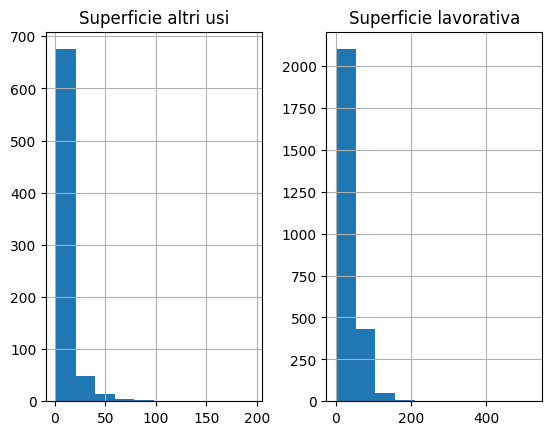

In [25]:
SERVICES[NUM].hist()

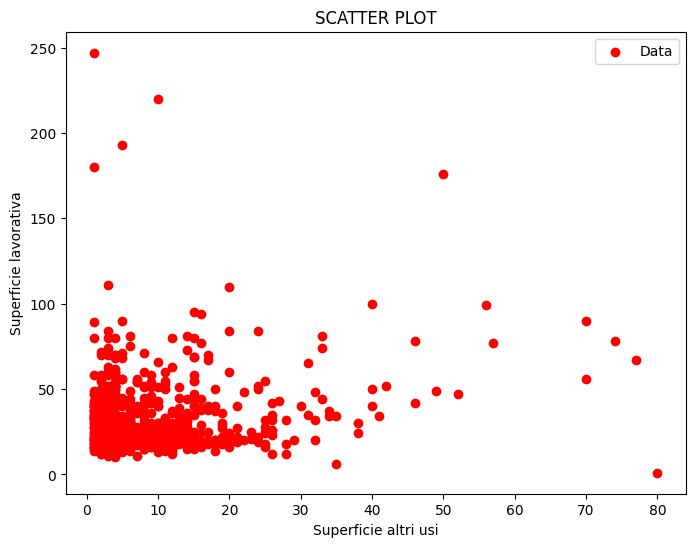

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 6))
plt.scatter(SERVICES[NUM[0]], SERVICES[NUM[1]], marker='o', color='r', label='Data')
plt.xlabel('Superficie altri usi')
plt.ylabel('Superficie lavorativa')
plt.title('SCATTER PLOT')
plt.legend()
plt.grid(False)
plt.show()

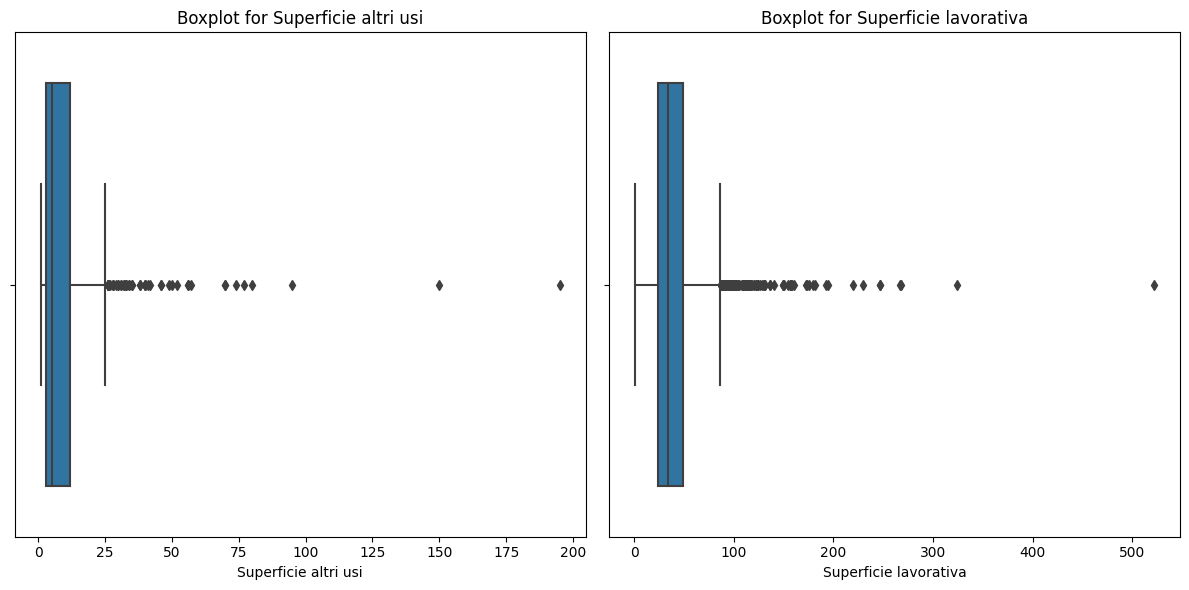

In [27]:
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# First boxplot
sns.boxplot(x=SERVICES[NUM[0]], ax=axes[0])
axes[0].set_title(f"Boxplot for {NUM[0]}")

# Second boxplot
sns.boxplot(x=SERVICES[NUM[1]], ax=axes[1])
axes[1].set_title(f"Boxplot for {NUM[1]}")

# Adjust layout
plt.tight_layout()
plt.show()
